In [1]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy
import torch
from torch import nn
import pandas as pd

In [2]:
SEED = 2985
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state= SEED)


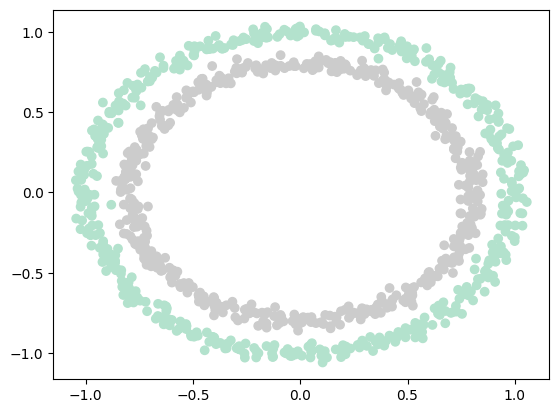

In [3]:
circles = pd.DataFrame({'x1': X[:,0],
                        'x2': X[:,1],
                        'label': y})

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.Pastel2)

In [4]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=SEED)



In [5]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))

In [6]:
model_0 = CircleModelV0()

loss_fun = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(params=model_0.parameters(),
                        lr=0.001)


In [7]:
torch.manual_seed(SEED)
epochs = 200
for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fun(y_logits,
                    y_train)
    acc = accuracy_score(y_train.detach().numpy(), y_pred.detach().numpy())
    f1 = f1_score(y_train.detach().numpy(), y_pred.detach().numpy())

    optim.zero_grad()
    loss.backward()
    optim.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fun(test_logits, y_test)
        test_acc = accuracy_score(y_test, test_pred)
        test_f1 = f1_score(y_test, test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | F1: {f1:.2f}")
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f} | Test F1: {test_f1:.2f}")

Epoch: 0 | Loss: 0.70067 | Acc: 0.51 | F1: 0.00
Test loss: 0.71461 | Test acc: 0.47 | Test F1: 0.00
Epoch: 10 | Loss: 0.69828 | Acc: 0.51 | F1: 0.00
Test loss: 0.71028 | Test acc: 0.47 | Test F1: 0.00
Epoch: 20 | Loss: 0.69644 | Acc: 0.51 | F1: 0.00
Test loss: 0.70663 | Test acc: 0.47 | Test F1: 0.00
Epoch: 30 | Loss: 0.69511 | Acc: 0.51 | F1: 0.00
Test loss: 0.70367 | Test acc: 0.47 | Test F1: 0.00
Epoch: 40 | Loss: 0.69421 | Acc: 0.51 | F1: 0.00
Test loss: 0.70136 | Test acc: 0.47 | Test F1: 0.00
Epoch: 50 | Loss: 0.69364 | Acc: 0.51 | F1: 0.00
Test loss: 0.69962 | Test acc: 0.47 | Test F1: 0.00
Epoch: 60 | Loss: 0.69329 | Acc: 0.51 | F1: 0.00
Test loss: 0.69833 | Test acc: 0.47 | Test F1: 0.00
Epoch: 70 | Loss: 0.69309 | Acc: 0.51 | F1: 0.00
Test loss: 0.69742 | Test acc: 0.47 | Test F1: 0.00
Epoch: 80 | Loss: 0.69298 | Acc: 0.51 | F1: 0.00
Test loss: 0.69679 | Test acc: 0.47 | Test F1: 0.00
Epoch: 90 | Loss: 0.69292 | Acc: 0.44 | F1: 0.00
Test loss: 0.69637 | Test acc: 0.41 | Test 

## OTRO MODELO

In [8]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    


In [9]:
def test_model(modelo, rate=0.001, epochs=100,
                X_train=X_train, 
                X_test=X_test,
                y_train=y_train,
                y_test=y_test):
    loss_fun = nn.BCEWithLogitsLoss()
    optim = torch.optim.Adam(params=modelo.parameters(),
                            lr=rate)
    for epoch in range(epochs):
        modelo.train()
        y_logits = modelo(X_train).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))
        loss = loss_fun(y_logits,
                        y_train)
        acc = accuracy_score(y_train.detach().numpy(), y_pred.detach().numpy())
        f1 = f1_score(y_train.detach().numpy(), y_pred.detach().numpy())

        optim.zero_grad()
        loss.backward()
        optim.step()

        modelo.eval()
        with torch.inference_mode():
            test_logits = modelo(X_test).squeeze()
            test_pred = torch.round(torch.sigmoid(test_logits))
            test_loss = loss_fun(test_logits, y_test)
            test_acc = accuracy_score(y_test, test_pred)
            test_f1 = f1_score(y_test, test_pred)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | F1: {f1:.2f}")
            print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f} | Test F1: {test_f1:.2f}")
    return modelo
    

In [10]:
model_1 = CircleModelV1()
test_model(model_1)

Epoch: 0 | Loss: 0.70164 | Acc: 0.48 | F1: 0.45
Test loss: 0.69179 | Test acc: 0.54 | Test F1: 0.55
Epoch: 10 | Loss: 0.69761 | Acc: 0.48 | F1: 0.45
Test loss: 0.69103 | Test acc: 0.54 | Test F1: 0.54
Epoch: 20 | Loss: 0.69508 | Acc: 0.48 | F1: 0.43
Test loss: 0.69169 | Test acc: 0.54 | Test F1: 0.52
Epoch: 30 | Loss: 0.69370 | Acc: 0.48 | F1: 0.39
Test loss: 0.69281 | Test acc: 0.49 | Test F1: 0.42
Epoch: 40 | Loss: 0.69309 | Acc: 0.51 | F1: 0.00
Test loss: 0.69418 | Test acc: 0.47 | Test F1: 0.00
Epoch: 50 | Loss: 0.69290 | Acc: 0.45 | F1: 0.18
Test loss: 0.69527 | Test acc: 0.40 | Test F1: 0.17
Epoch: 60 | Loss: 0.69288 | Acc: 0.49 | F1: 0.36
Test loss: 0.69582 | Test acc: 0.42 | Test F1: 0.30
Epoch: 70 | Loss: 0.69288 | Acc: 0.49 | F1: 0.38
Test loss: 0.69598 | Test acc: 0.45 | Test F1: 0.34
Epoch: 80 | Loss: 0.69288 | Acc: 0.48 | F1: 0.36
Test loss: 0.69589 | Test acc: 0.45 | Test F1: 0.34
Epoch: 90 | Loss: 0.69288 | Acc: 0.48 | F1: 0.35
Test loss: 0.69577 | Test acc: 0.43 | Test 

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [12]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [17]:
model_2 = CircleModelV2()


In [19]:
test_model(model_2)

Epoch: 0 | Loss: 0.00073 | Acc: 1.00 | F1: 1.00
Test loss: 0.00964 | Test acc: 0.99 | Test F1: 1.00
Epoch: 10 | Loss: 0.00071 | Acc: 1.00 | F1: 1.00
Test loss: 0.00924 | Test acc: 0.99 | Test F1: 1.00
Epoch: 20 | Loss: 0.00070 | Acc: 1.00 | F1: 1.00
Test loss: 0.00885 | Test acc: 0.99 | Test F1: 1.00
Epoch: 30 | Loss: 0.00069 | Acc: 1.00 | F1: 1.00
Test loss: 0.00848 | Test acc: 0.99 | Test F1: 1.00
Epoch: 40 | Loss: 0.00067 | Acc: 1.00 | F1: 1.00
Test loss: 0.00828 | Test acc: 0.99 | Test F1: 1.00
Epoch: 50 | Loss: 0.00066 | Acc: 1.00 | F1: 1.00
Test loss: 0.00827 | Test acc: 0.99 | Test F1: 1.00
Epoch: 60 | Loss: 0.00064 | Acc: 1.00 | F1: 1.00
Test loss: 0.00827 | Test acc: 0.99 | Test F1: 1.00
Epoch: 70 | Loss: 0.00063 | Acc: 1.00 | F1: 1.00
Test loss: 0.00815 | Test acc: 0.99 | Test F1: 1.00
Epoch: 80 | Loss: 0.00061 | Acc: 1.00 | F1: 1.00
Test loss: 0.00810 | Test acc: 0.99 | Test F1: 1.00
Epoch: 90 | Loss: 0.00059 | Acc: 1.00 | F1: 1.00
Test loss: 0.00806 | Test acc: 0.99 | Test 

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)